In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import warnings
import random

sns.set(style = 'darkgrid')

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings('ignore')

In [3]:
# 准备数据
arr1 = np.random.randn(100)
arr1

array([-1.38508183e-01,  2.89315248e-01, -4.69902659e-01, -4.24565763e-01,
        8.25134772e-01,  2.14157666e-01, -2.81344636e-01, -2.12407571e-01,
        9.58856184e-01,  1.94852147e-01, -1.80047445e-01,  1.37229575e+00,
       -1.42110634e+00, -7.68618636e-01,  4.79541214e-01, -7.58388513e-02,
       -1.24677902e+00,  1.89749648e+00, -4.68048685e-01, -7.98860989e-01,
        8.18172432e-01,  2.16187623e-01,  1.06225981e-01,  4.40352078e-01,
        7.96894324e-01,  4.34641807e-02,  1.69155708e+00,  2.03193905e-01,
        1.55074640e+00, -4.84092118e-01, -1.54832799e+00, -3.33913080e-01,
       -4.10269840e-01,  3.10890001e-01,  2.07937620e+00,  6.43303011e-01,
       -5.95888399e-01, -1.63789888e+00,  1.58837228e+00, -2.70534165e-01,
       -2.27428901e-02, -5.87154040e-01, -9.38023491e-01, -5.37235755e-01,
        1.39055329e+00,  8.58990310e-02, -5.63606023e-02, -2.15969408e-01,
        5.62543538e-01, -5.28898952e-01,  3.14836609e-01,  1.41038186e+00,
       -1.77777366e+00, -

<Axes: ylabel='Count'>

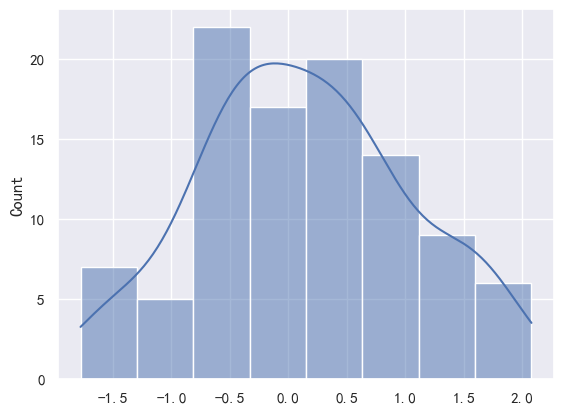

In [17]:
sns.histplot(arr1, kde = True) # sns.distplot(arr1, kde = True) 以下示例是这个老写法 # kde = True是否显示核密度曲线

# Seaborn的可视化分析
## 载入数据

In [5]:
df1 = pd.read_excel('data/data1.xlsx')

In [6]:
df1.head()

,性别,体重,身高,民族,年龄,学院,专业,胸围,肺呼量,体育成绩,血型,BMI
0,男,69.0,172.0,汉,19.0,公卫,预防,94.0,4203.0,35.0,A型,23.323418
1,男,64.0,178.0,汉,21.0,公卫,预防,87.0,5095.0,43.0,A型,20.199470
2,男,56.0,161.0,汉,19.0,公卫,预防,87.0,3858.0,40.0,B型,21.604105
3,男,51.0,160.0,汉,20.0,公卫,预防,79.0,3561.0,37.0,O型,19.921875
4,男,59.0,170.0,汉,18.0,公卫,预防,86.5,3185.0,39.0,O型,20.415225


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   性别      599 non-null    object 
 1   体重      590 non-null    float64
 2   身高      590 non-null    float64
 3   民族      599 non-null    object 
 4   年龄      596 non-null    float64
 5   学院      599 non-null    object 
 6   专业      599 non-null    object 
 7   胸围      590 non-null    float64
 8   肺呼量     590 non-null    float64
 9   体育成绩    596 non-null    float64
 10  血型      599 non-null    object 
 11  BMI     590 non-null    float64
dtypes: float64(7), object(5)
memory usage: 56.3+ KB


In [8]:
# 处理缺失值
df2 = df1.dropna()

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584 entries, 0 to 598
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   性别      584 non-null    object 
 1   体重      584 non-null    float64
 2   身高      584 non-null    float64
 3   民族      584 non-null    object 
 4   年龄      584 non-null    float64
 5   学院      584 non-null    object 
 6   专业      584 non-null    object 
 7   胸围      584 non-null    float64
 8   肺呼量     584 non-null    float64
 9   体育成绩    584 non-null    float64
 10  血型      584 non-null    object 
 11  BMI     584 non-null    float64
dtypes: float64(7), object(5)
memory usage: 59.3+ KB


### 直方图

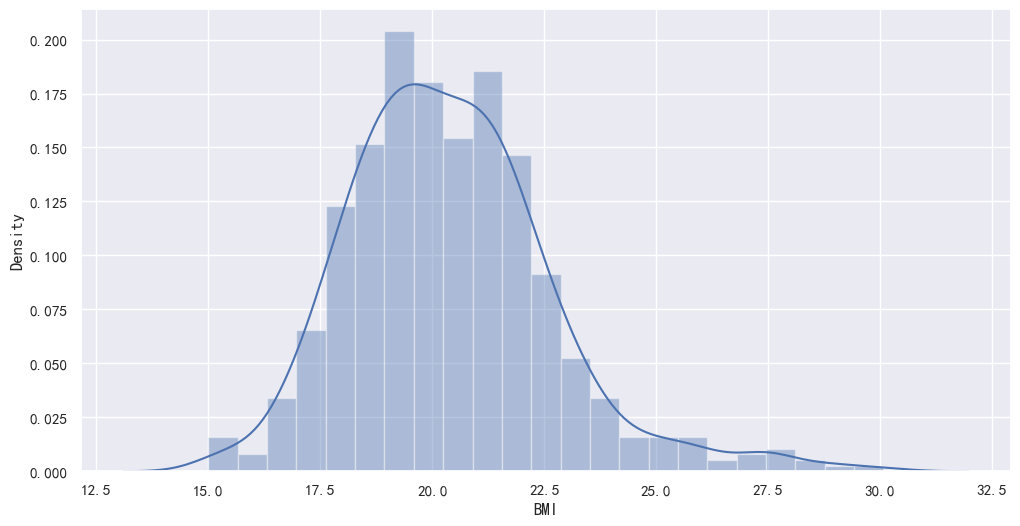

In [11]:
plt.figure(figsize = (12,6))
sns.distplot(df2['BMI'])
plt.show()

<Axes: xlabel='身高'>

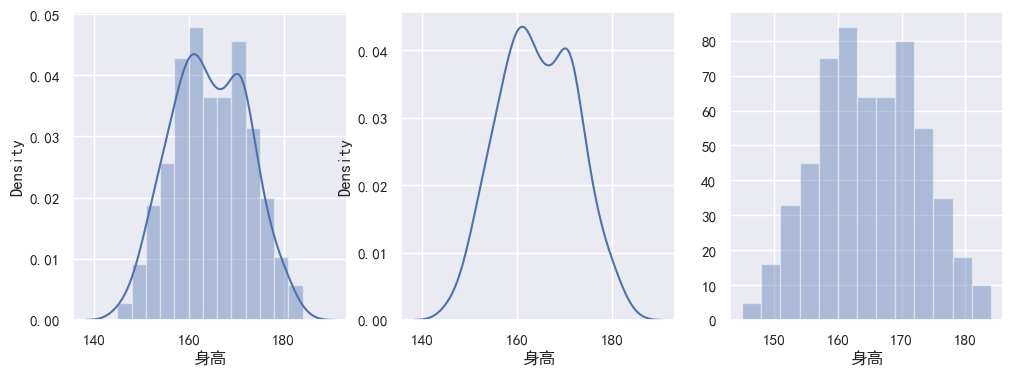

In [13]:
# 通过多画布观察直方图的不同效果
plt.figure(figsize = (12,4))
ax1 = plt.subplot(1,3,1)
sns.distplot(df2['身高'], ax = ax1)
ax2 = plt.subplot(1,3,2)
sns.distplot(df2['身高'], ax = ax2, hist = False)
ax3 = plt.subplot(1,3,3)
sns.distplot(df2['身高'], ax = ax3, kde = False)

In [14]:
# 使用scipy获取标准正态分布（核密度曲线是根据当前数据集的数据生成的分布，而标准分布相当于当前范围下标准的分布）
from scipy.stats import *

<Axes: xlabel='身高', ylabel='Density'>

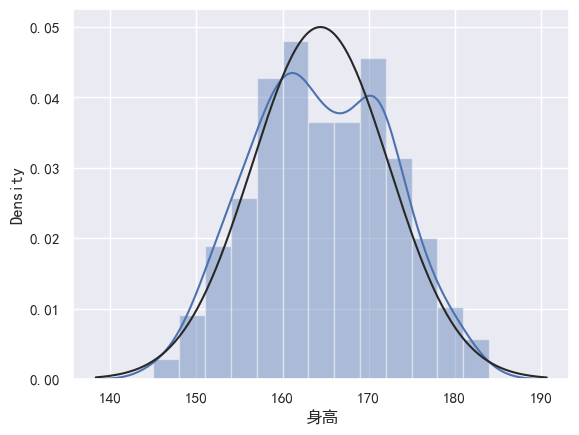

In [15]:
sns.distplot(df2['身高'], fit = norm) # fit = norm基于当前均值、标准差，生成标准正态分布曲线

In [16]:
df2.身高.describe()

count    584.000000
mean     164.406678
std        7.987196
min      145.000000
25%      158.000000
50%      164.000000
75%      171.000000
max      184.000000
Name: 身高, dtype: float64

### 箱图

<Axes: ylabel='肺呼量'>

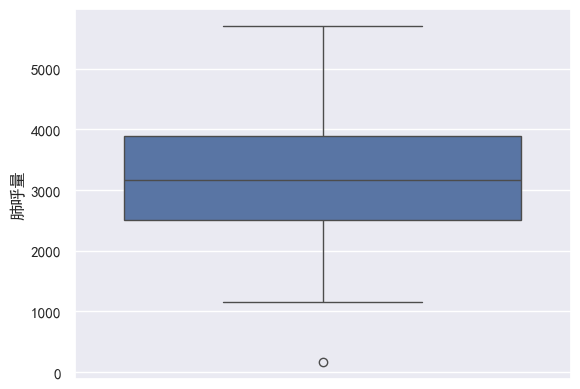

In [19]:
sns.boxplot(y = '肺呼量', data = df2)

In [21]:
df2[df2['肺呼量']<500]

,性别,体重,身高,民族,年龄,学院,专业,胸围,肺呼量,体育成绩,血型,BMI
575,女,45.0,161.0,汉,20.0,生物技术,生物技术,76.0,167.0,40.0,A型,17.360441


<Axes: xlabel='身高'>

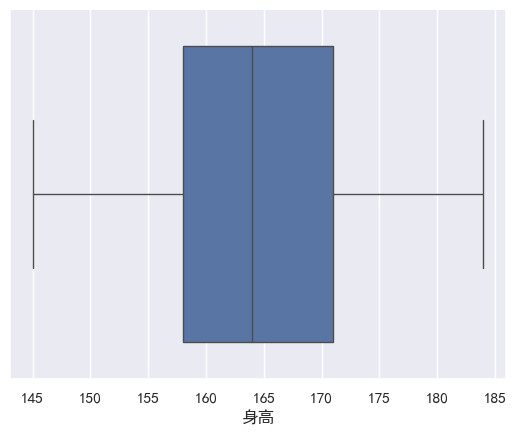

In [23]:
sns.boxplot(x = df2.身高)
# 如果只需要做一个维度的观察，也可以在省略data参数的情况下，用Series作为x或y的参数值，代码比较简洁

### 计数条形图

In [24]:
df2.head()

,性别,体重,身高,民族,年龄,学院,专业,胸围,肺呼量,体育成绩,血型,BMI
0,男,69.0,172.0,汉,19.0,公卫,预防,94.0,4203.0,35.0,A型,23.323418
1,男,64.0,178.0,汉,21.0,公卫,预防,87.0,5095.0,43.0,A型,20.199470
2,男,56.0,161.0,汉,19.0,公卫,预防,87.0,3858.0,40.0,B型,21.604105
3,男,51.0,160.0,汉,20.0,公卫,预防,79.0,3561.0,37.0,O型,19.921875
4,男,59.0,170.0,汉,18.0,公卫,预防,86.5,3185.0,39.0,O型,20.415225


<Axes: xlabel='专业', ylabel='count'>

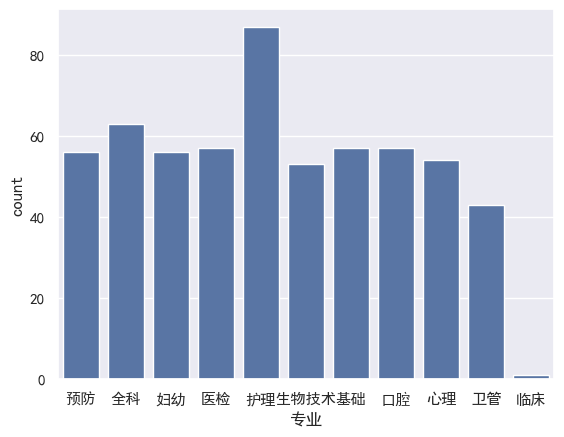

In [25]:
sns.countplot(x = '专业', data = df2)

<Axes: xlabel='count', ylabel='专业'>

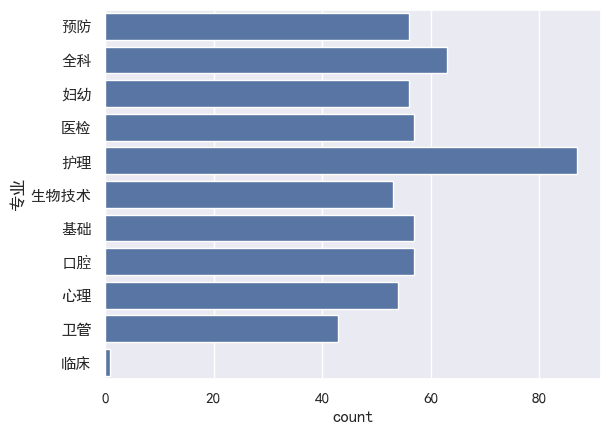

In [26]:
sns.countplot(y = '专业', data = df2)

In [28]:
sns.countplot(x = '性别', y = '血型', data = df2) #不能同时放两个分类变量在x，y

TypeError: Cannot pass values for both `x` and `y`.

### 分组的直方图（分类对连续）

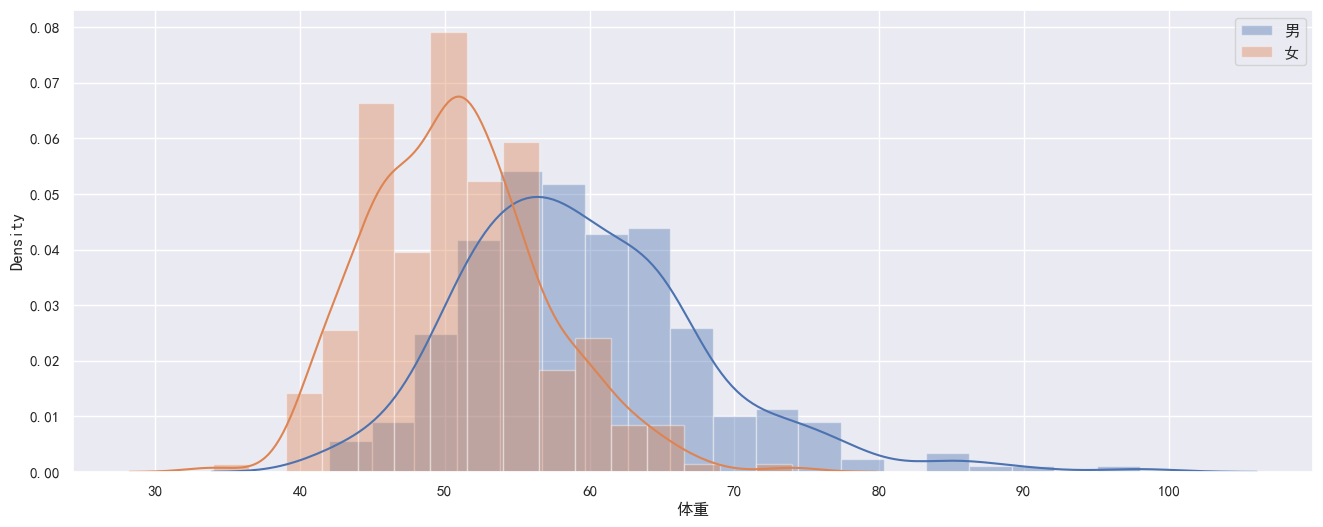

In [29]:
plt.figure(figsize = (16,6))
sns.distplot(df2[df2['性别'] == '男']['体重'], label = '男')
sns.distplot(df2[df2['性别'] == '女']['体重'], label = '女')
plt.legend()
plt.show()

<Axes: xlabel='肺呼量', ylabel='Density'>

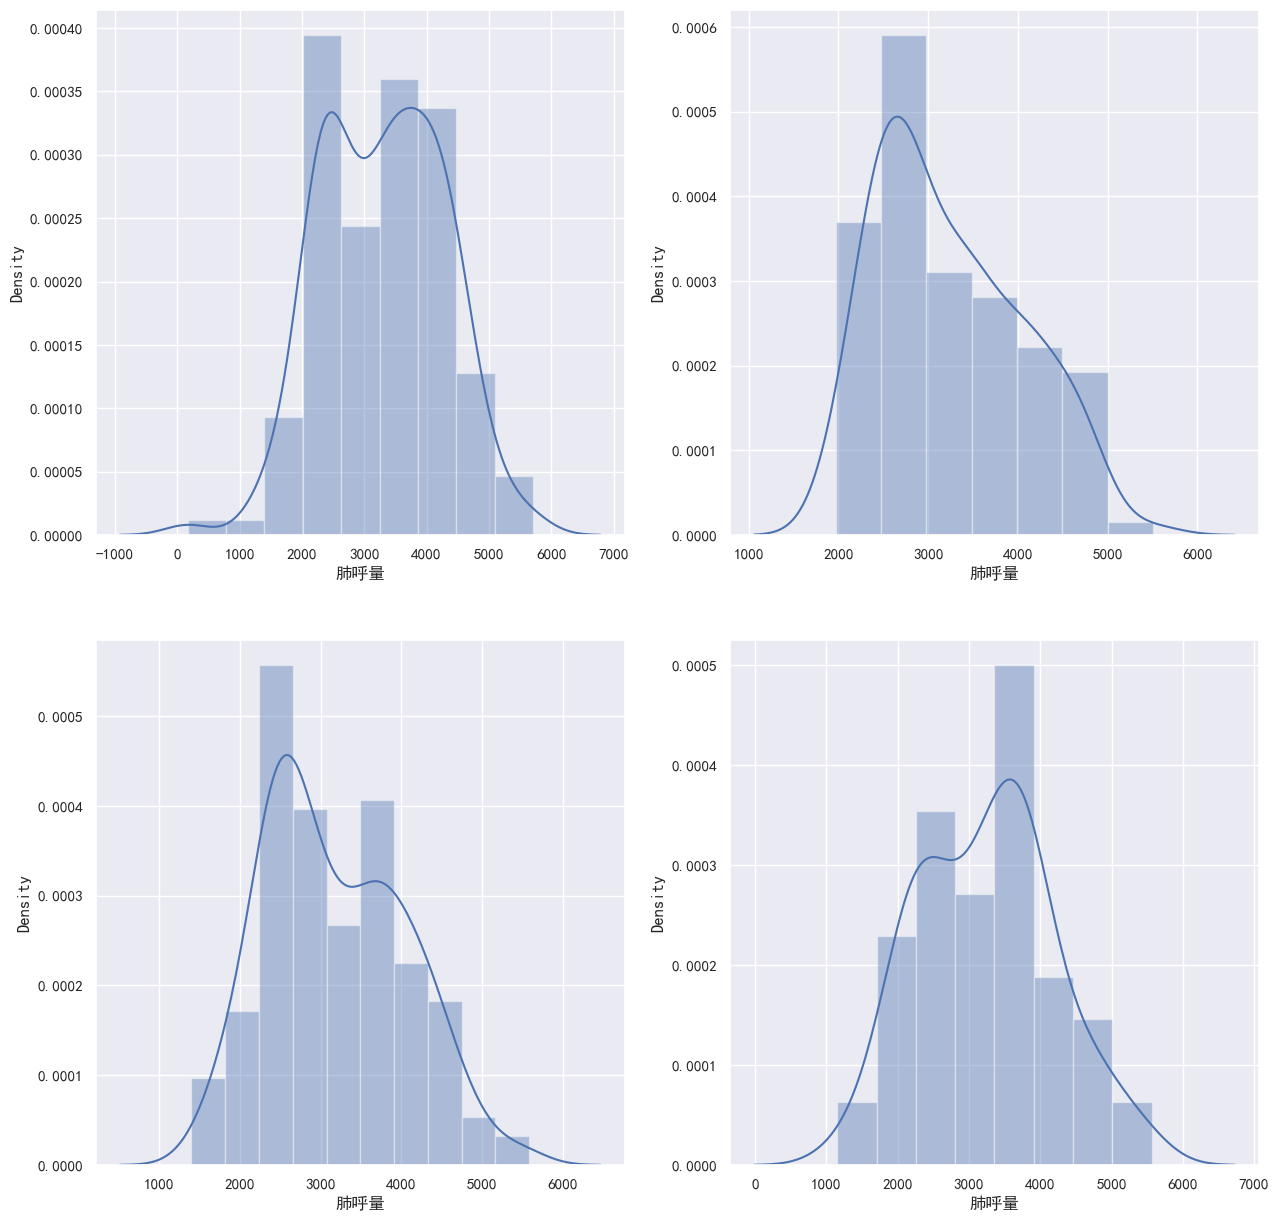

In [31]:
# 在不同的图上观察
plt.figure(figsize = (15,15))
ax1 = plt.subplot(2,2,1)
sns.distplot(df2[df2['血型'] == 'A型']['肺呼量'], ax = ax1)
ax2 = plt.subplot(2,2,2)
sns.distplot(df2[df2['血型'] == 'B型']['肺呼量'], ax = ax2)
ax3 = plt.subplot(2,2,3)
sns.distplot(df2[df2['血型'] == 'O型']['肺呼量'], ax = ax3)
ax4 = plt.subplot(2,2,4)
sns.distplot(df2[df2['血型'] == 'AB型']['肺呼量'], ax = ax4)

### 分组的箱图（分类对连续）
有hue方法比直方图做分组更好

<Axes: xlabel='性别', ylabel='肺呼量'>

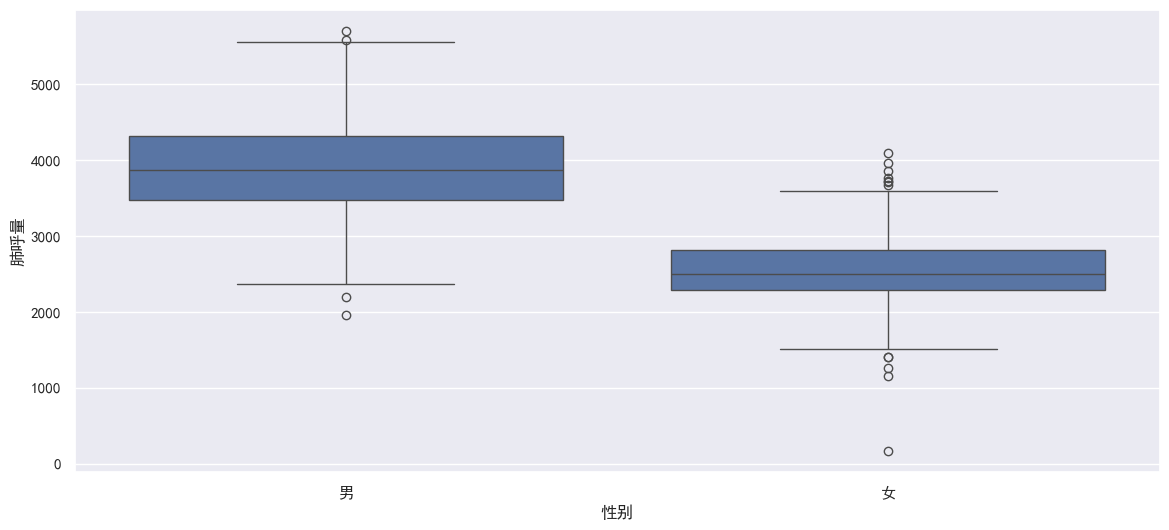

In [37]:
plt.figure(figsize = (14,6))
sns.boxplot(x = '性别', y = '肺呼量', data = df2) #x,y可以调换顺序自动调整绘制的方向，同样的，也不适合同时放两个连续变量在xy

<Axes: xlabel='血型', ylabel='肺呼量'>

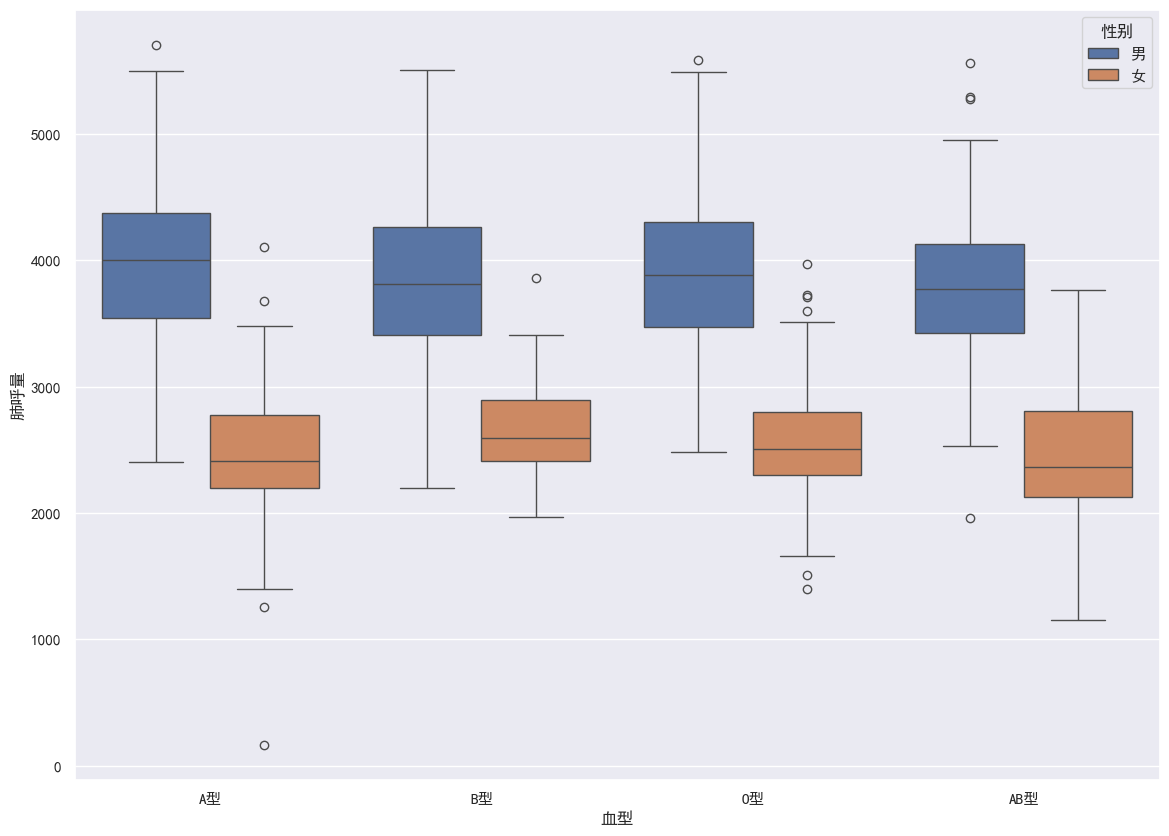

In [38]:
plt.figure(figsize = (14,10))
sns.boxplot(hue = '性别', x = '血型', y = '肺呼量', data = df2)
#hue：在图例上分组

### 柱状/条形图（分类对连续）

<Axes: xlabel='血型'>

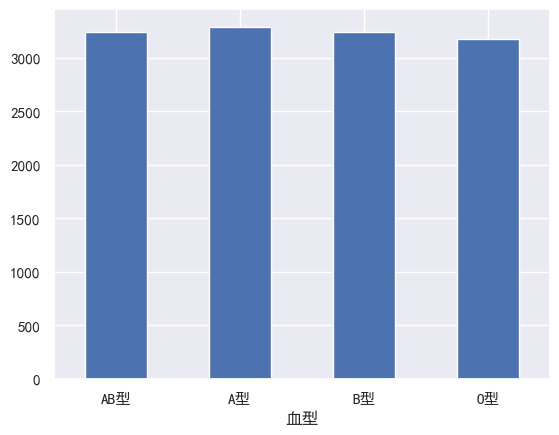

In [39]:
# 观察不同血型的学生肺呼量的差异
df2.groupby('血型')['肺呼量'].mean().plot(kind = 'bar', rot = 0)

<Axes: xlabel='血型', ylabel='肺呼量'>

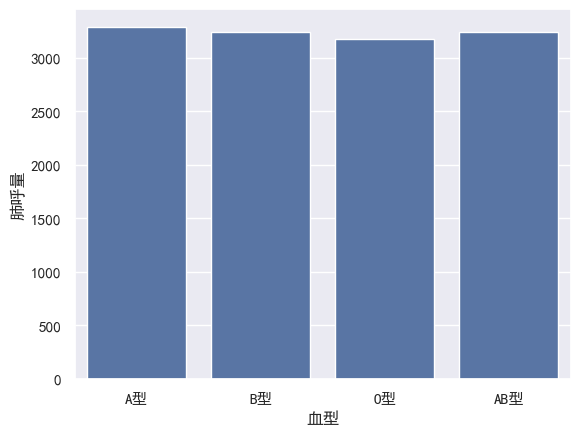

In [40]:
sns.barplot(x = '血型', y = '肺呼量', data = df2, ci = 0) # ci: 置信区间

<Axes: xlabel='肺呼量', ylabel='血型'>

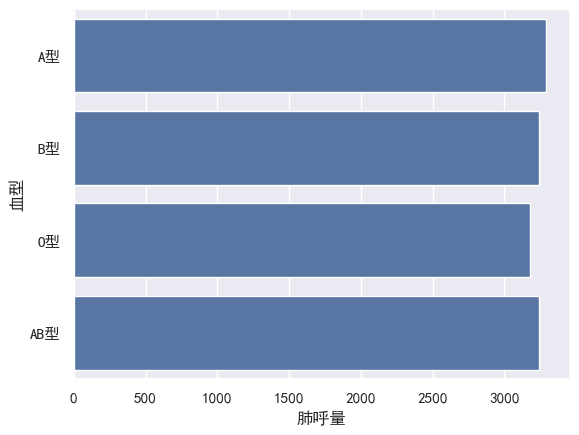

In [41]:
sns.barplot(y = '血型', x = '肺呼量', data = df2, ci = 0)

<Axes: xlabel='血型', ylabel='肺呼量'>

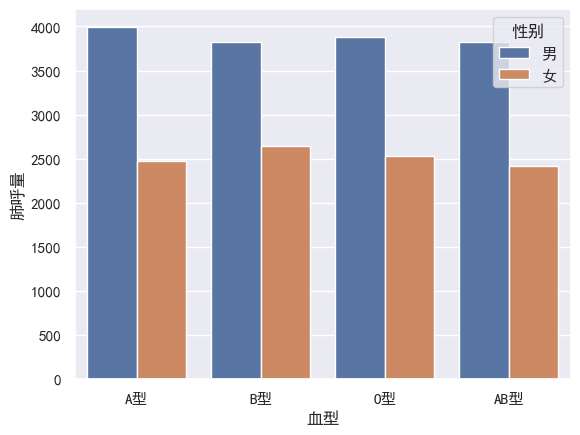

In [42]:
sns.barplot(x = '血型', y = '肺呼量', hue = '性别', data = df2, ci = 0)

<Axes: xlabel='血型'>

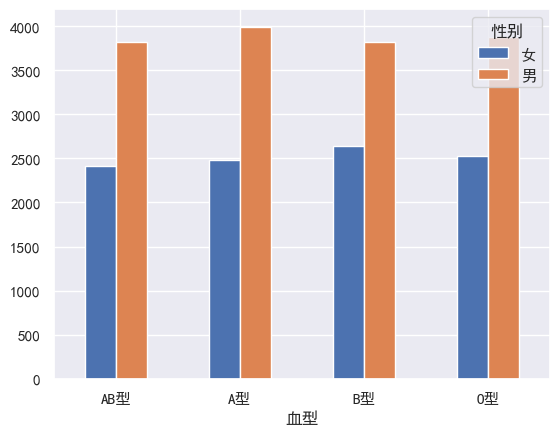

In [43]:
# 用pandas实现上面这个
df2.groupby(['血型', '性别'])['肺呼量'].mean().unstack().plot(kind = 'bar', rot = 0)

### 分组的柱形图/条形图

<Axes: xlabel='性别', ylabel='count'>

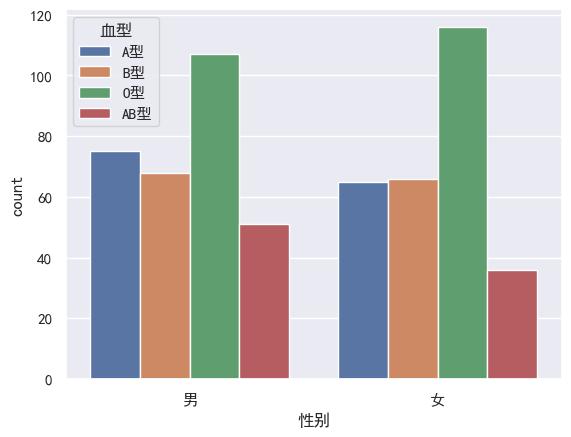

In [44]:
sns.countplot(x = '性别', hue = '血型', data = df2) #countplot的y轴会有计数量，因此要绘制多组可以继续借助hue参数

<Axes: xlabel='血型'>

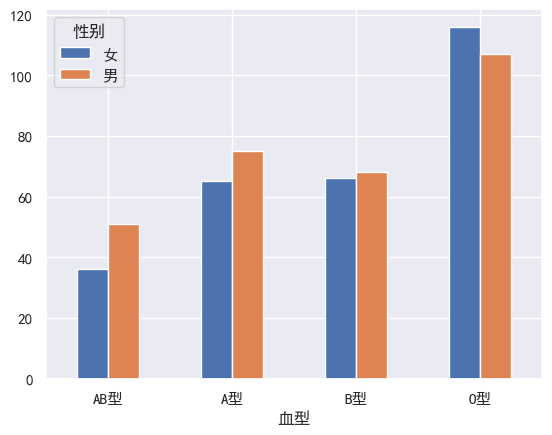

In [45]:
df2.groupby(['性别', '血型'])['身高'].count().unstack('性别').plot(kind = 'bar', rot = 0)

### 热力图（分类对分类）

In [47]:
df2.groupby(['血型','性别'])['身高'].count().unstack()

性别,女,男
血型,,
AB型,36,51
A型,65,75
B型,66,68
O型,116,107


<Axes: xlabel='性别', ylabel='血型'>

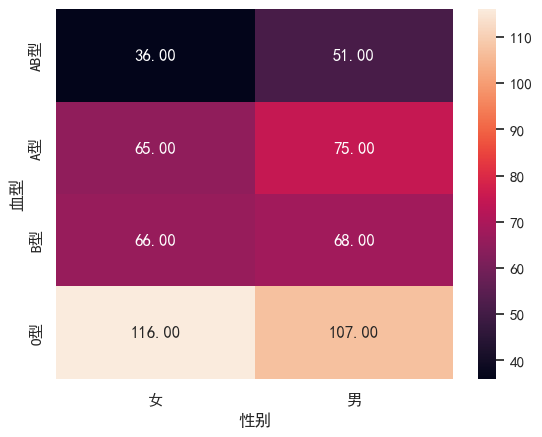

In [49]:
sns.heatmap(df2.groupby(['血型','性别'])['身高'].count().unstack(), annot = True, fmt = '.2f') 
# fmt这里和格式化字符串不一样不能'%.2f'

### 散点图

<Axes: xlabel='身高', ylabel='体重'>

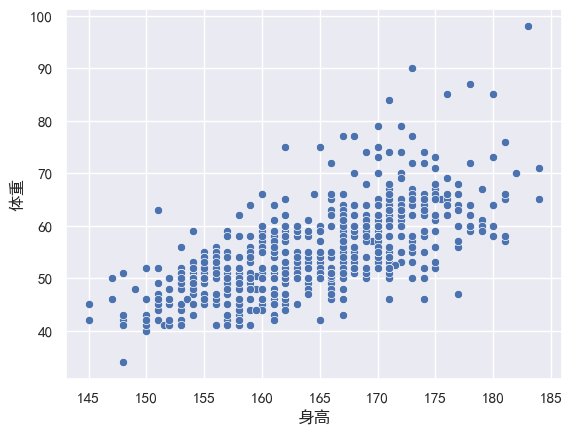

In [50]:
sns.scatterplot(x = '身高', y = '体重', data = df2)

<Axes: xlabel='身高', ylabel='肺呼量'>

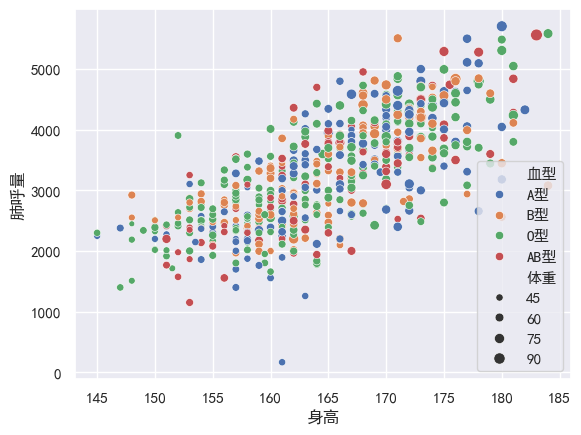

In [52]:
sns.scatterplot(x = '身高', y = '肺呼量', size = '体重', hue = '血型', data = df2) # size点大小，也相当于增加了一个观察维度

<Axes: xlabel='身高', ylabel='肺呼量'>

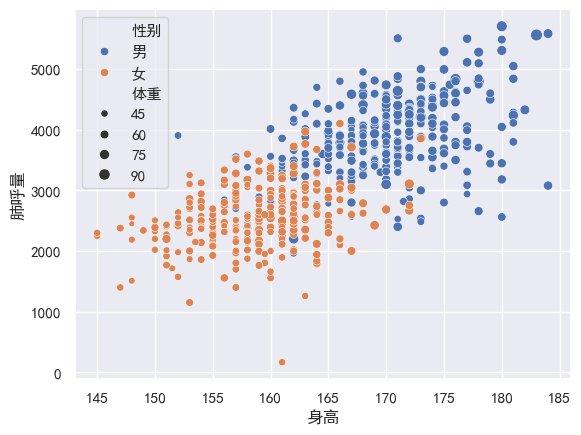

In [54]:
sns.scatterplot(x = '身高', y = '肺呼量', size = '体重', hue = '性别', data = df2) 
# 这里对比下可以看出，hue一般是放分类变量（或者连续变量视为分类变量），这里性别作为hue参数效果更明显
# 后续机器学习中会对这些变量之间的统计分析做更细致的研究

### 联合图（连续对连续）

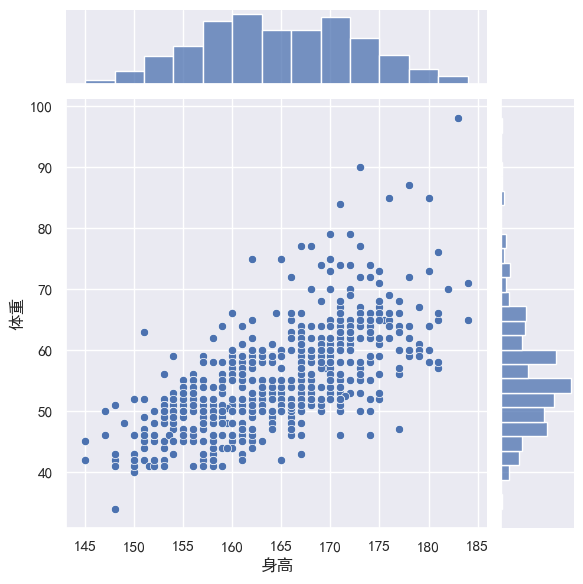

In [60]:
sns.jointplot(x = '身高', y = '体重', data = df2, kind = 'scatter')

In [61]:
# ?sns.jointplot #查看kind参数选择

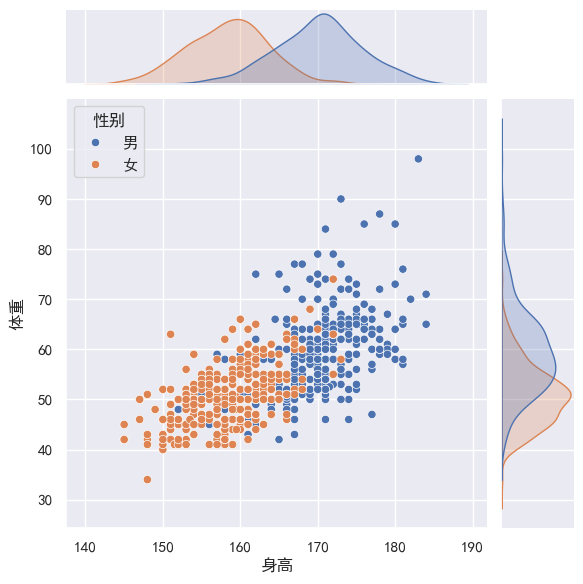

In [62]:
sns.jointplot(x = '身高', y = '体重', data = df2, kind = 'scatter', hue = '性别')

### 散点图矩阵

<Figure size 1600x1600 with 0 Axes>

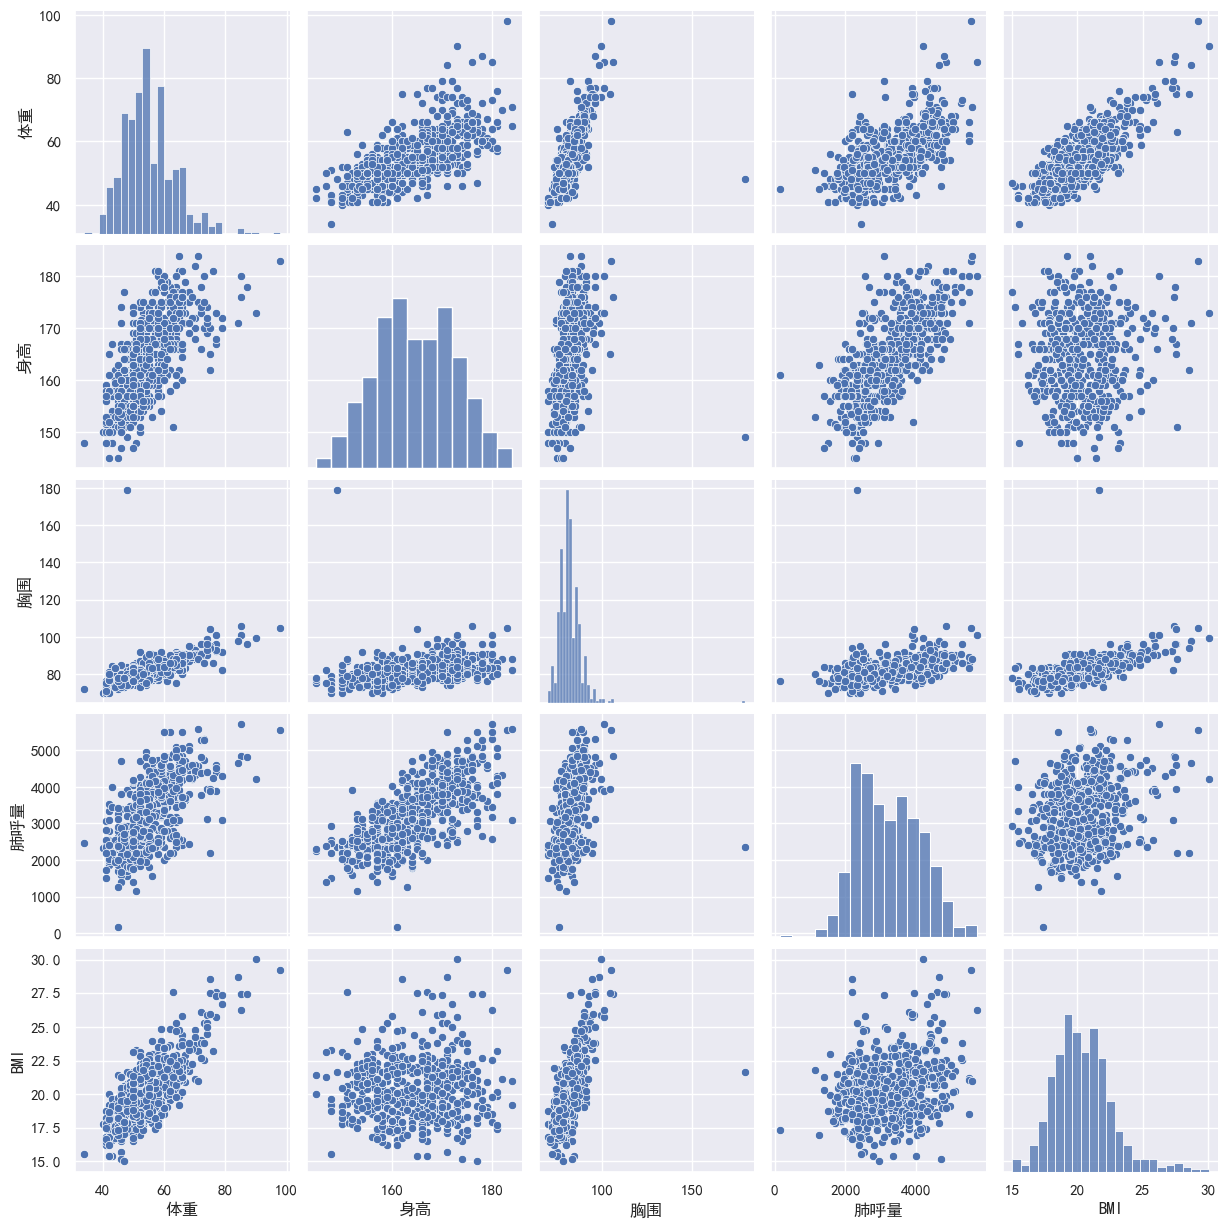

In [64]:
plt.figure(figsize = (16,16))
sns.pairplot(data = df2,
             vars = ['体重', '身高', '胸围', '肺呼量', 'BMI']
             ) # ['体重', '身高', '年龄', '胸围', '肺呼量', 'BMI'] 年龄相关性较小，直接去掉

In [66]:
# 去除胸围和肺呼量中的异常值
df2.胸围.sort_values()

332     70.0
453     70.0
468     70.0
392     70.0
436     71.0
       ...  
49     101.0
62     104.0
18     105.0
7      106.0
326    179.0
Name: 胸围, Length: 584, dtype: float64

In [67]:
df3 = df2[(df2['胸围'] < 179) & (df2['肺呼量'] > 500)]
df3

,性别,体重,身高,民族,年龄,学院,专业,胸围,肺呼量,体育成绩,血型,BMI
0,男,69.0,172.0,汉,19.0,公卫,预防,94.0,4203.0,35.0,A型,23.323418
1,男,64.0,178.0,汉,21.0,公卫,预防,87.0,5095.0,43.0,A型,20.199470
2,男,56.0,161.0,汉,19.0,公卫,预防,87.0,3858.0,40.0,B型,21.604105
3,男,51.0,160.0,汉,20.0,公卫,预防,79.0,3561.0,37.0,O型,19.921875
4,男,59.0,170.0,汉,18.0,公卫,预防,86.5,3185.0,39.0,O型,20.415225
...,...,...,...,...,...,...,...,...,...,...,...,...
594,女,50.0,163.0,汉,21.0,卫管,卫管,76.0,2759.0,41.0,O型,18.818924
595,女,50.0,153.0,汉,19.0,卫管,卫管,81.0,2514.0,35.0,O型,21.359306
596,女,53.0,156.0,汉,19.0,卫管,卫管,80.0,2800.0,40.0,B型,21.778435
597,女,47.0,162.0,汉,19.0,卫管,卫管,78.0,2700.0,40.0,B型,17.908855


<Figure size 1600x1600 with 0 Axes>

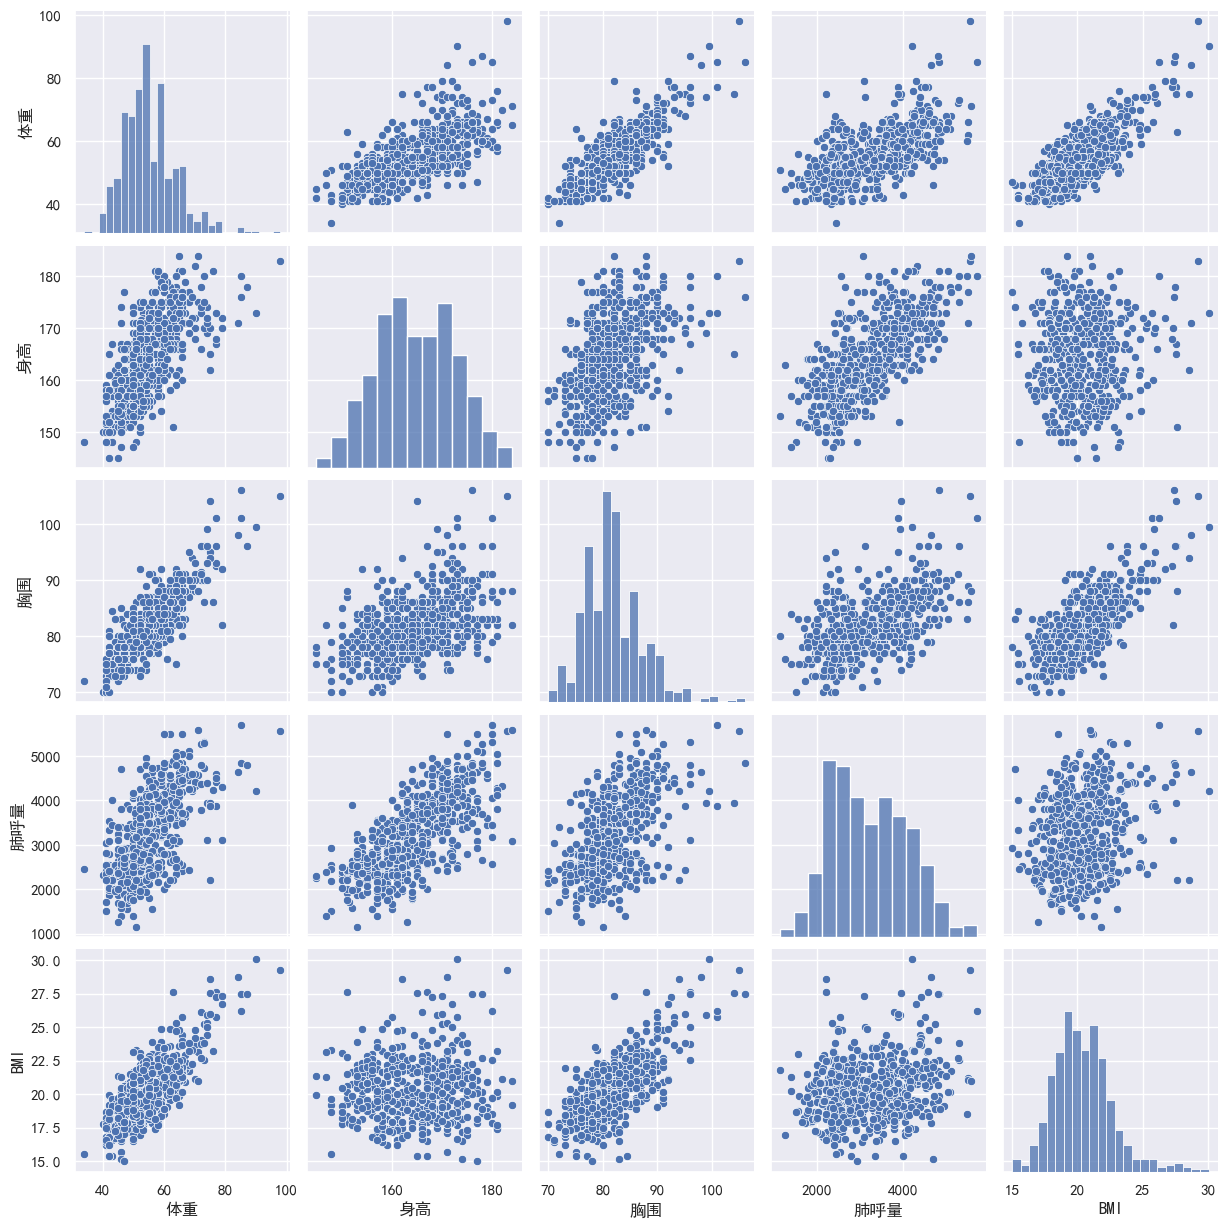

In [68]:
plt.figure(figsize = (16,16))
sns.pairplot(data = df3,
             vars = ['体重', '身高', '胸围', '肺呼量', 'BMI']
             )

<Figure size 1600x1600 with 0 Axes>

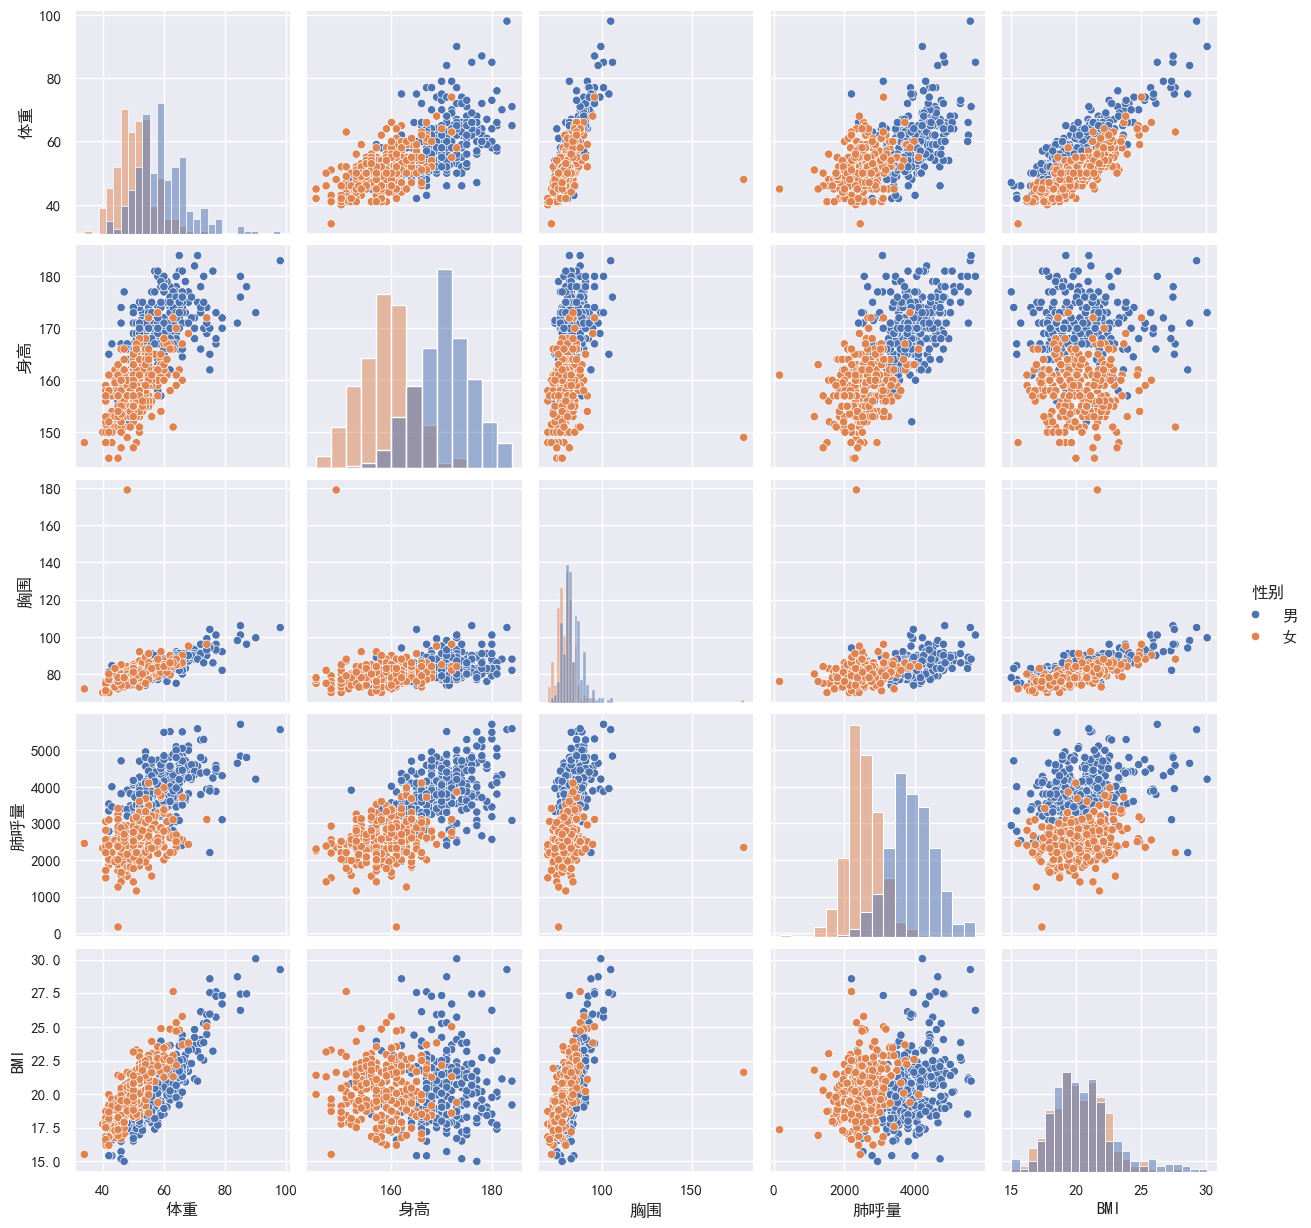

In [71]:
plt.figure(figsize = (16,16))
sns.pairplot(data = df2,
             vars = ['体重', '身高', '胸围', '肺呼量', 'BMI'],
             hue = '性别',
             diag_kind = 'hist'
             ) # 对角线上的图形形式也可以通过 diag_kind 参数控制

### 热力图展示相关系数表

In [72]:
# 皮尔逊相关系数
df_corr = df3[['体重', '身高', '胸围', '肺呼量', 'BMI']].corr()

In [73]:
df_corr

,体重,身高,胸围,肺呼量,BMI
体重,1.000000,0.671439,0.830527,0.636270,0.775335
身高,0.671439,1.000000,0.466808,0.721063,0.058300
胸围,0.830527,0.466808,1.000000,0.538456,0.723531
肺呼量,0.636270,0.721063,0.538456,1.000000,0.239825
BMI,0.775335,0.058300,0.723531,0.239825,1.000000


<Axes: >

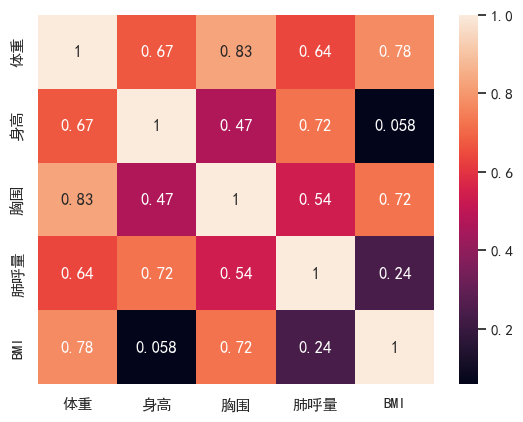

In [74]:
sns.heatmap(df_corr, annot = True)

### 回归图

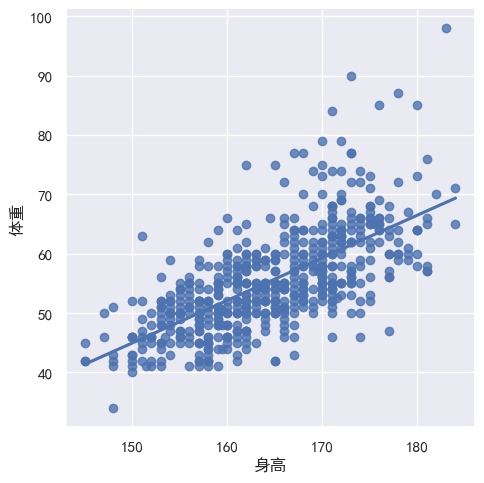

In [77]:
sns.lmplot(x = '身高', y = '体重', data = df3, ci = 0)

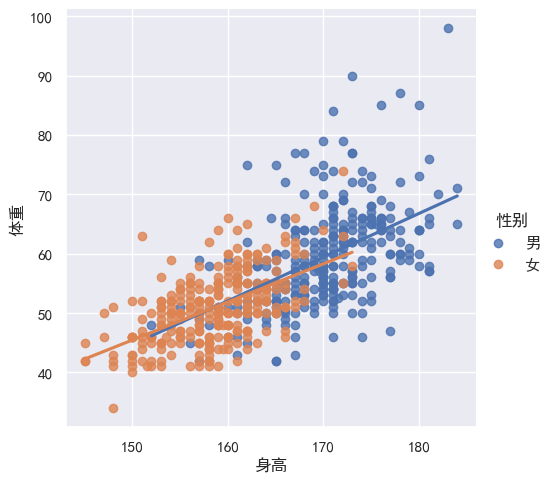

In [78]:
sns.lmplot(x = '身高', y = '体重', data = df3, ci = 0, hue = '性别')

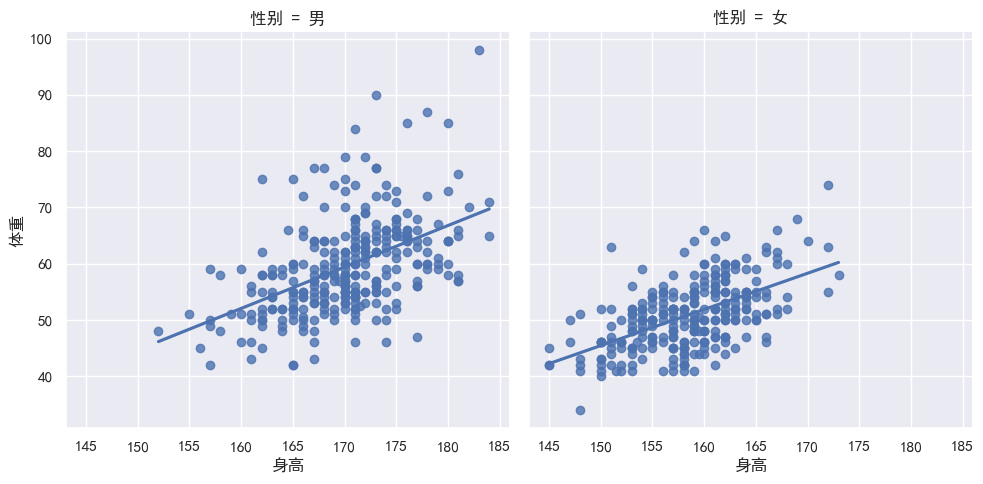

In [79]:
sns.lmplot(x = '身高', y = '体重', data = df3, ci = 0, col = '性别')

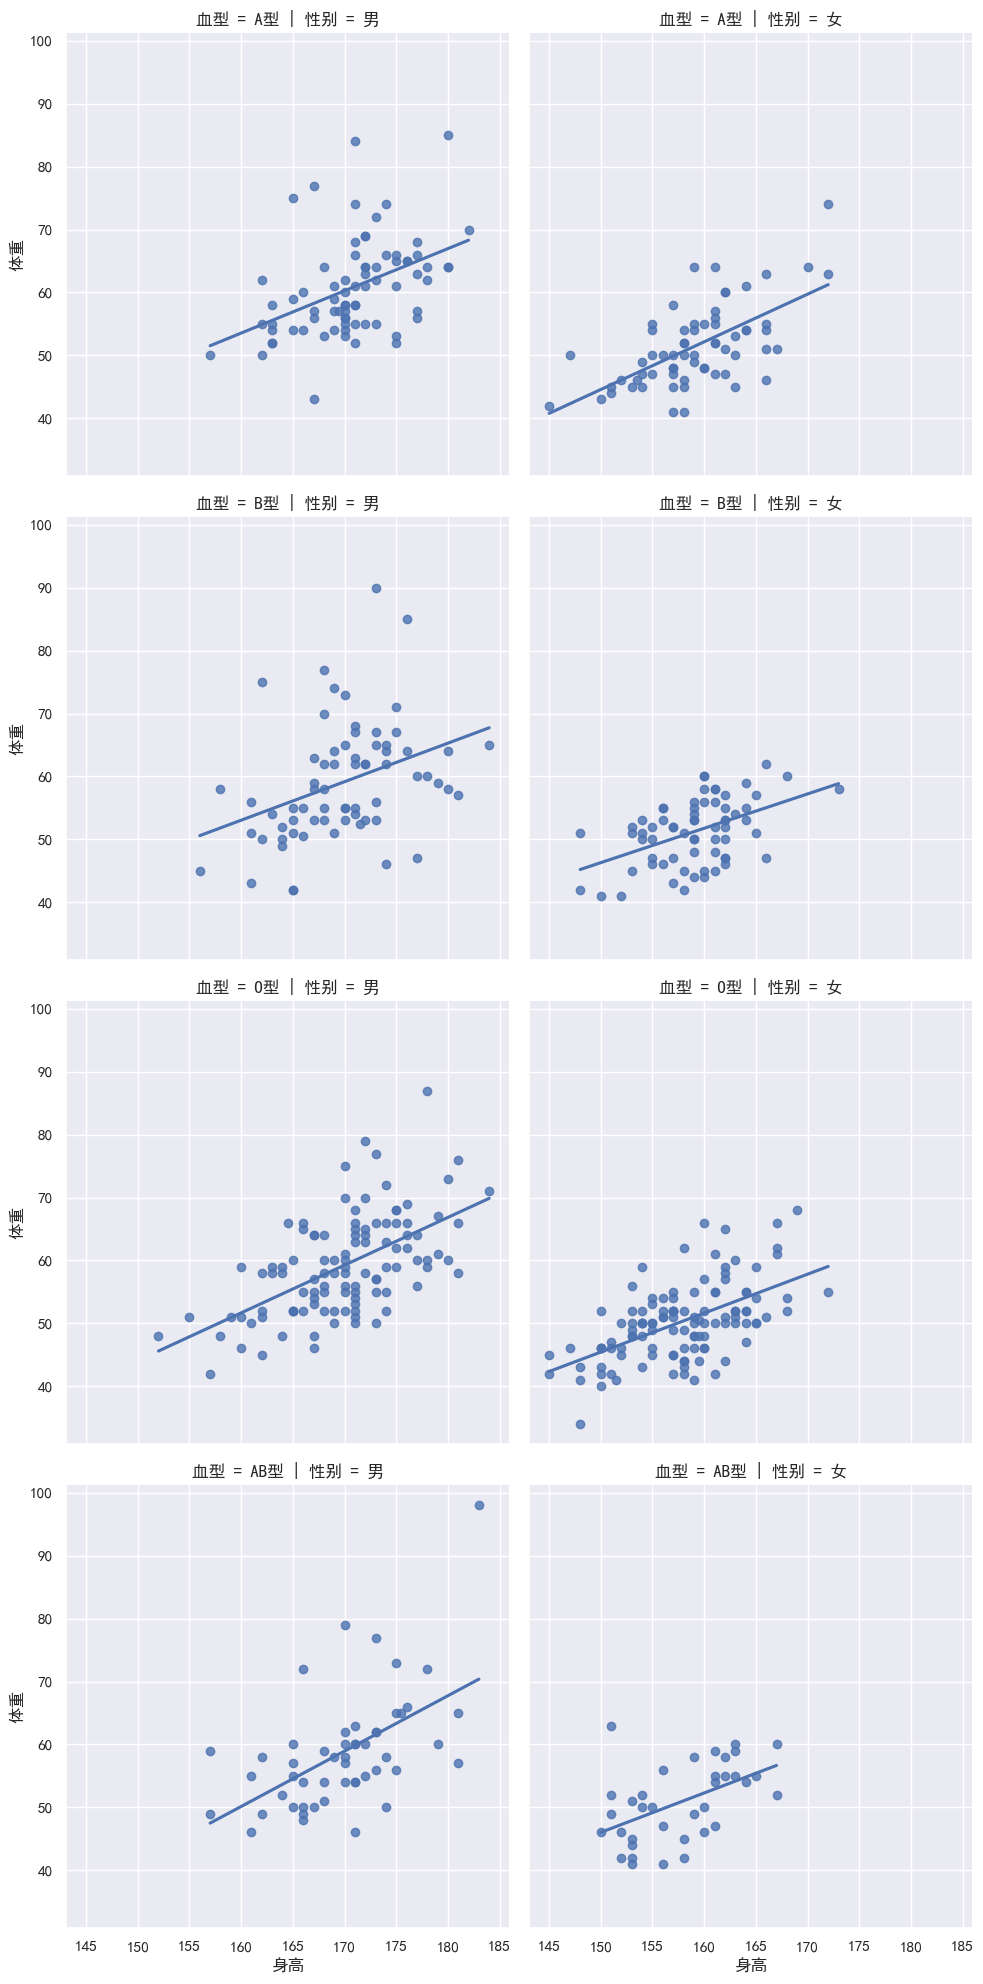

In [81]:
sns.lmplot(x = '身高', y = '体重', data = df3, ci = 0, col = '性别', row = '血型')

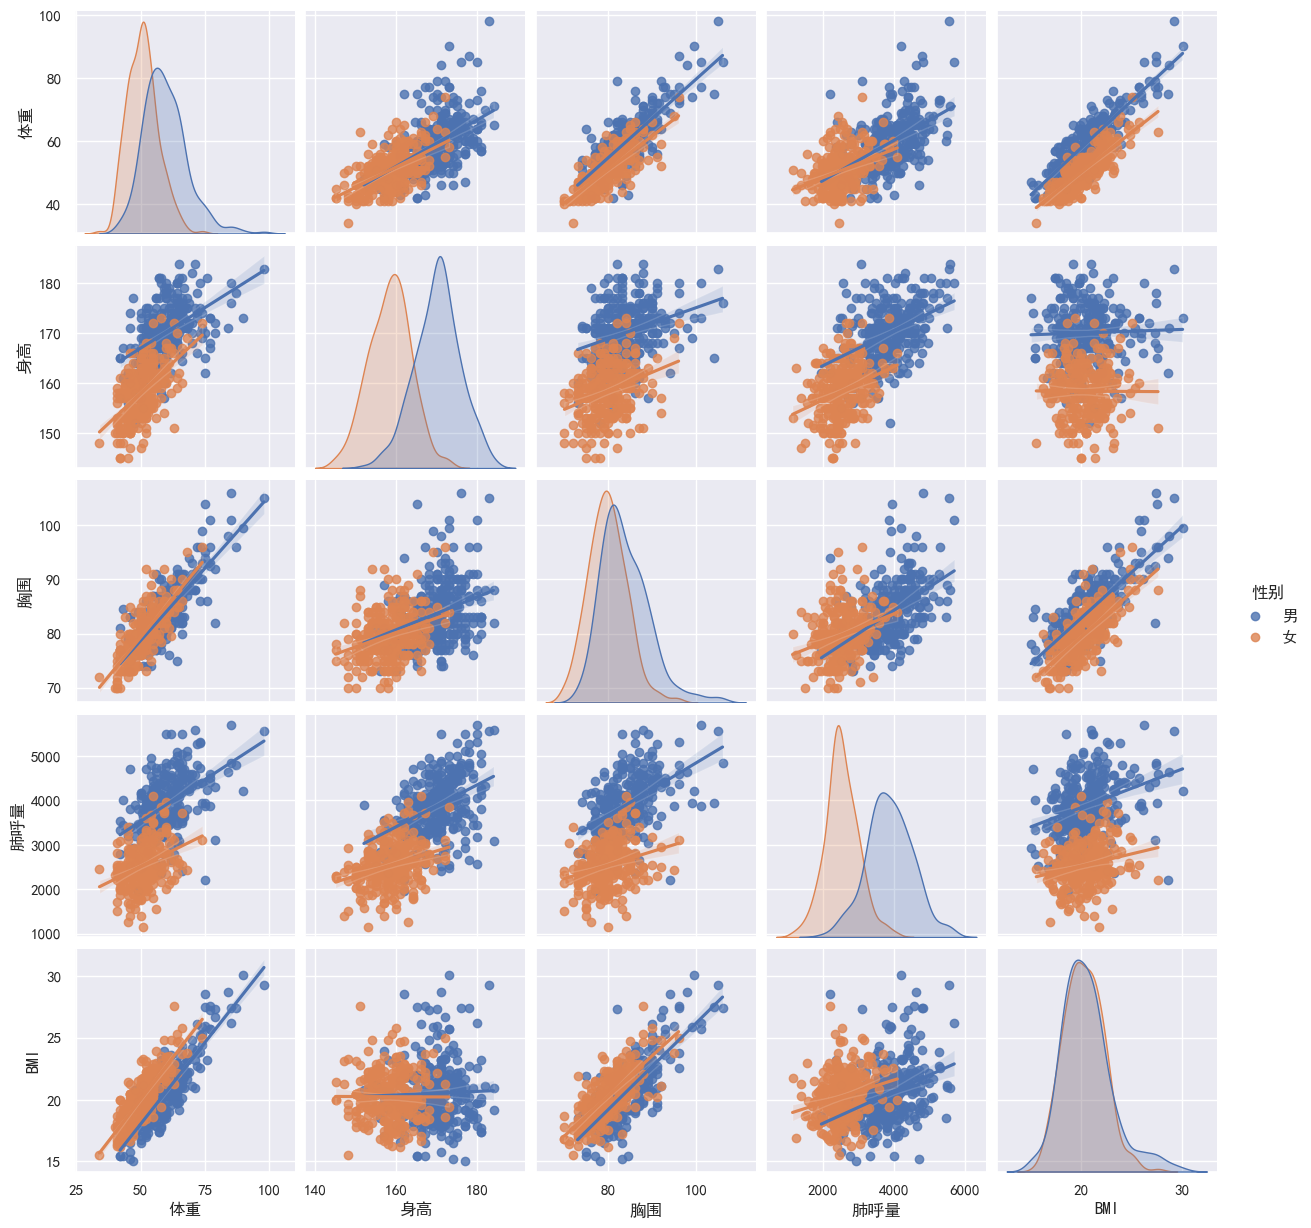

In [82]:
sns.pairplot(data = df3,
             vars = ['体重', '身高', '胸围', '肺呼量', 'BMI'],
             kind = 'reg',
             hue = '性别')